NLP Basic


In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> names
      Unzipping corpora/names.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
from nltk.corpus import names

In [0]:
print(names.words()[:10])
print(len(names.words()))

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']
7944


In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [0]:
lemmatizer.lemmatize('media')

'medium'

Text Data

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
groups = fetch_20newsgroups()

In [0]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [0]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [0]:
groups.target[0]

7

In [0]:
groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Data Visualization

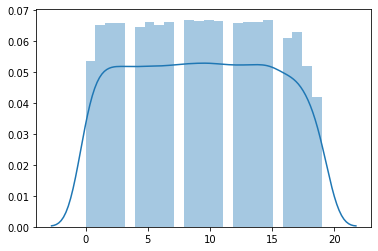

In [0]:
import seaborn as sns
sns.distplot(groups.target)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

In [0]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

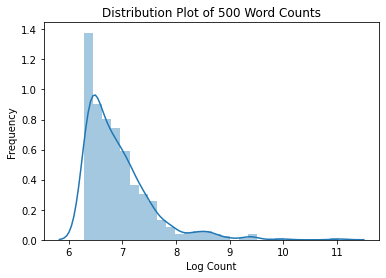

In [0]:
sns.distplot(np.log(transformed.toarray().sum(axis = 0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
transformed = tfidf.fit_transform(groups.data)

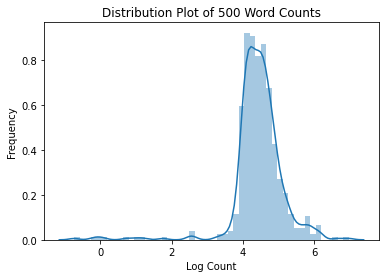

In [0]:
sns.distplot(np.log(transformed.toarray().sum(axis = 0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.show()

Text Preprocessing


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [0]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

for post in groups.data:
  lemmatized_list = [lemmatizer.lemmatize(word.lower()) \
                     for word in post.split() \
                     if word.isalpha() and word not in all_names]
  cleaned.append(' '.join(lemmatized_list))

In [0]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

Clustering

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [0]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

for post in groups.data:
  lemmatized_list = [lemmatizer.lemmatize(word.lower()) \
                     for word in post.split() \
                     if word.isalpha() and word not in all_names]
  cleaned.append(' '.join(lemmatized_list))

In [0]:
km = KMeans(n_clusters= 20)
km.fit(transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

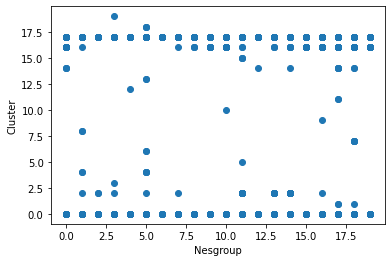

In [0]:
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Nesgroup')
plt.ylabel('Cluster')
plt.show()